# Final Test FGA Machine Learning Digitalent Scholarsip 2019

# Oleh

1.   Adwin Nugroho Siswoyo
2.   Maulana Firmansyah Aksan
3.   Muhammad Ulfi





**Import Library dan Mounted Google Drive**

In [0]:
from google.colab import drive #memanggil library google drive untuk menggunakan dataset yang ada di google drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -q tensorflow #perintah disamping digunakan untuk menginstall tensorflow

In [0]:
#dibawah ini adalah library-library yang dibutuhkan untuk memproses gambar, membangun model, mengoptimasi model sampai mengevaluasi model
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
import glob
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab.patches import cv2_imshow
from PIL import Image
from keras.models import Model
from keras.layers import Input, Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [0]:
%load_ext tensorboard #memanggil extension tensorboard

# 1. Persiapan Dataset

**Pembagian Data Train**

In [0]:
#4 baris pertama deklarasi variabel
imagePaths_train = '/content/drive/My Drive/FINAL_TEST_DTS/DATASET/train/'
gender_type = ["1female", "2male"]
train_x = []
train_y = []

for category in gender_type:  # iterasi untuk folder female dan male

        path = imagePaths_train + category #buat path ke folder female atau male
        gender = gender_type.index(category)  # ngasih klasifikasi gender  (0 or a 1). 0=female 1=male
        
        for img in os.listdir(path):  # perulangan untuk setiap image di dalam folder female dan male
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                image = cv2.resize(img_array, (50,50)) #resize image
                train_x.append(image)  # add data image ke train x
                train_y.append(gender)  # add data gender ke train y
            except Exception as e:  # in the interest in keeping the output clean...
                pass


In [0]:
np.array(train_x).shape #perintah disamping digunakan untuk melihat informasi jumlah dan dimensi data 

(800, 50, 50, 3)

**Pembagian Data Test**

In [0]:
imagePaths_test = '/content/drive/My Drive/FINAL_TEST_DTS/DATASET/validation/'
#gender_type sudah di deklarasikan diatas, yaitu male dan female
test_x = []
test_y = []

for category in gender_type:  # iterasi untuk folder female dan male

        path = imagePaths_test + category #buat path ke folder female atau male
        gender = gender_type.index(category)  # ngasih klasifikasi gender  (0 or a 1). 0=female 1=male
        
        for img in os.listdir(path):  # perulangan untuk setiap image di dalam folder female dan male
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                image = cv2.resize(img_array, (50,50)) #resize image
                test_x.append(image)  # add data image ke train x
                test_y.append(gender)  # add data gender ke train y
            except Exception as e:  # in the interest in keeping the output clean...
                pass


In [0]:
np.array(test_x).shape

(240, 50, 50, 3)

In [0]:
#mengubah data ke numpy array 
train_x = np.array(train_x, dtype=np.float32) / 255.0
test_x =  np.array(test_x, dtype=np.float32) / 255.0

In [0]:
#mengubah dimensi dengan perintah reshape agar data train dan test sama
train_x = np.reshape(train_x, (len(train_x), 50, 50, 3))
test_x = np.reshape(test_x, (len(test_x), 50, 50, 3))

In [0]:
#mendeklarasikan kategori perempuan dan laki-laki dengan variabel bernama train_y dan test_y
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [0]:
#mengkonversi layer menggunakan Zero Padding dan MaxPooling
#Activation menggunkan RelU
inputs = Input(shape=(50, 50, 3))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5,5), strides=(3,3), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2,2))(conv_layer)
conv_layer = Conv2D(32, (3,3), strides=(1,1), activation='relu')(conv_layer)
conv_layer = ZeroPadding2D(padding=(1, 1))(conv_layer)
conv_layer = Conv2D(64, (3,3), strides=(1,1), activation='relu')(conv_layer)

In [0]:
#mengkonversi dimensi data menjadi 1 dimensi dengan perintah Flatten
flatten = Flatten()(conv_layer)

In [0]:
#Deklarasi Fully Connected Layer digunakan untuk menghitung skor kelas. Seperti Jaringan Saraf biasa dan seperti namanya, setiap neuron dalam lapisan ini akan terhubung ke semua angka dalam volume.
#Activation menggunkan RelU
fc_layer = Dense(256, activation='relu')(flatten)
fc_layer = Dense(64, activation='relu')(fc_layer)
outputs = Dense(2, activation='softmax')(fc_layer)

# 2. Pembangunan Model

In [0]:
#Deklarasi Model
model = Model(inputs=inputs, outputs=outputs)

In [0]:
adam = Adam(lr=0.001) #optimasi menggunakan Adam
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Print Model Summary untuk melihat skor modelnya
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 54, 54, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 16)        1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          4640      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          1849

In [0]:
# Use Tensorboard
callbacks = TensorBoard(log_dir = './Graph')

# Train for 100 epochs and use tensorboard Callback
H = model.fit(train_x, train_y, batch_size=256, epochs=100, verbose=1,
          validation_data=(test_x, test_y), callbacks=[callbacks])

# Save Weights
model.save_weights('weights.h5')

Train on 800 samples, validate on 240 samples
Epoch 1/100
800/800 [==============================] - 1s 976us/step - loss: 0.0033 - acc: 0.9988 - val_loss: 1.5145 - val_acc: 0.7833
Epoch 2/100
800/800 [==============================] - 1s 959us/step - loss: 0.0036 - acc: 0.9988 - val_loss: 1.5655 - val_acc: 0.7833
Epoch 3/100
800/800 [==============================] - 1s 942us/step - loss: 0.0032 - acc: 0.9988 - val_loss: 1.6041 - val_acc: 0.7917
Epoch 4/100
800/800 [==============================] - 1s 920us/step - loss: 0.0028 - acc: 0.9988 - val_loss: 1.6206 - val_acc: 0.7917
Epoch 5/100
800/800 [==============================] - 1s 961us/step - loss: 0.0023 - acc: 0.9988 - val_loss: 1.6115 - val_acc: 0.7833
Epoch 6/100
800/800 [==============================] - 1s 931us/step - loss: 0.0020 - acc: 0.9988 - val_loss: 1.5932 - val_acc: 0.7833
Epoch 7/100
800/800 [==============================] - 1s 957us/step - loss: 0.0021 - acc: 0.9975 - val_loss: 1.5791 - val_acc: 0.7917
Epoch 8/1

In [0]:
%tensorboard --logdir=Graph/

# Evaluasi Model

In [0]:
#evaluasi dengan melihat skor presisi recall dan f1 skor
# 0 dan 1 adalah kategori perempuan dan laki-laki
predictions = model.predict(test_x, batch_size=32)
print(classification_report(test_y.argmax(axis=1),
	predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       120
           1       0.76      0.82      0.79       120

    accuracy                           0.78       240
   macro avg       0.78      0.78      0.78       240
weighted avg       0.78      0.78      0.78       240



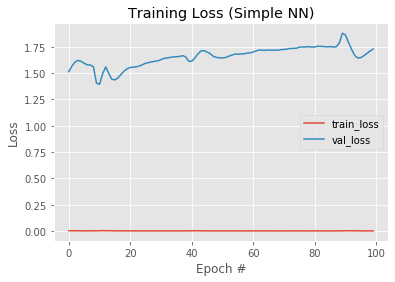

In [0]:
# plot the training loss and accuracy
# visualiasi loss dan epoch
import matplotlib.pyplot as plt
EPOCH = 100
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 4. Pengujian Model

In [0]:
#memasukkan gambar dan menguji model yang dibangun
queryPath = '/content/drive/My Drive/FINAL_TEST_DTS/DATASET/testing/face/7.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (50, 50))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
i = q_pred.argmax(axis=1)[0]
#label = lb.classes_[i]
i

1

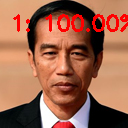

In [0]:
#menampilkan hasil pengujian dari gambar yang dimasukkan/diuji diatas
text = "{}: {:.2f}%".format(i, q_pred[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# show the output image
cv2_imshow(output)